In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import wfdb  # For reading .dat, .hea, .atr files
from wfdb import processing

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
DATA_DIR = "./data/physionet.org/files/mitdb/1.0.0"

In [3]:
record = wfdb.rdrecord(os.path.join(DATA_DIR, "100"))
annotation = wfdb.rdann(os.path.join(DATA_DIR, "100"), "atr")

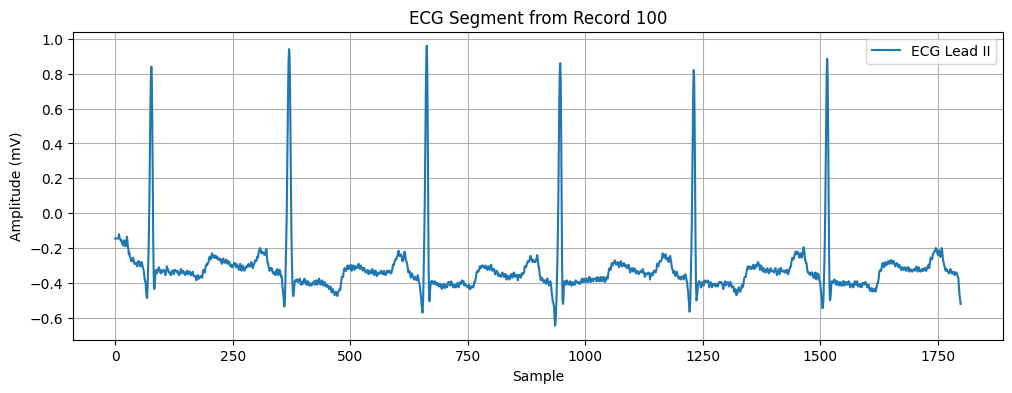

In [4]:
# Plot 5 seconds of signal
start = 0
end = int(record.fs * 5)  # 5 seconds worth of samples

plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[start:end, 0], label="ECG Lead II")
plt.title("ECG Segment from Record 100")
plt.xlabel("Sample")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True)
plt.show()